<a href="https://colab.research.google.com/github/Umeshtheru/ML_API_Heroku/blob/main/CIFAR_10_OBject_Recognisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#dataset api
!kaggle competitions download -c cifar-10

cifar-10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [ ]:
#extracting the compessed dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [ ]:
!pip install py7zr

In [ ]:
import py7zr

archive =py7zr.SevenZipFile('/content/train.7z', mode ='r')
archive.extractall()
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Import the Dependencies

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames=os.listdir('/content/train')

In [ ]:
#Labels Processing
lable_df= pd.read_csv('/content/trainLabels.csv')


In [ ]:
lable_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [ ]:
lable_df['label']=lable_df['label'].replace({'airplane':0,'automobile':1,'frog':2,'truck':3,'deer':4,'bird':5,'horse':6,'ship':7,'cat':8,'dog':9})
labels=lable_df['label']

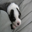

In [ ]:
#displayinh sample image
import cv2
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [ ]:
#Image Processing
#convert images to numpy arrays
id_list = list(lable_df['id'])
train_data_folder = '/content/train/'
data=[]
for id in id_list:
  image = Image.open(train_data_folder + str(id)+'.png')
  image = np.array(image)
  data.append(image)

In [ ]:
X=np.array(data)
Y=np.array(labels)
X.shape

(50000, 32, 32, 3)

In [ ]:
#Train_Test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
#scaling
X_train_scaled = X_train/255
X_test_scalled = X_test/255

Building the Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
number_of_class = 10

model = keras.Sequential([
     keras.layers.Flatten(input_shape=(32,32,3)),
     keras.layers.Dense(64,activation = 'relu'),
     keras.layers.Dense(number_of_class, activation='softmax')
])

In [ ]:
model.compile(optimizer = 'adam',
               loss='sparse_categorical_crossentropy',
               metrics= ['accuracy'])

In [ ]:
#trainig the neural network
model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

ResNet50

In [ ]:
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base=ResNet50(weights='imagenet',include_top=False, input_shape=(256,256,3))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
num_of_Classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_Classes,activation='softmax'))

In [ ]:
model.compile(optimizer = optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
  77/1125 [=>............................] - ETA: 10:28:12 - loss: 2.6353 - acc: 0.1339

In [ ]:
loss,accuray=model.evaluate(X_test_scaled,Y_test)
print('TestAccuracy:' accuracy)

In [ ]:
h=history
#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()
#plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()
